<a href="https://colab.research.google.com/github/Kruthi-Vikas-K/SCT_ML_1/blob/main/HousepricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validation RMSE: 52975.72


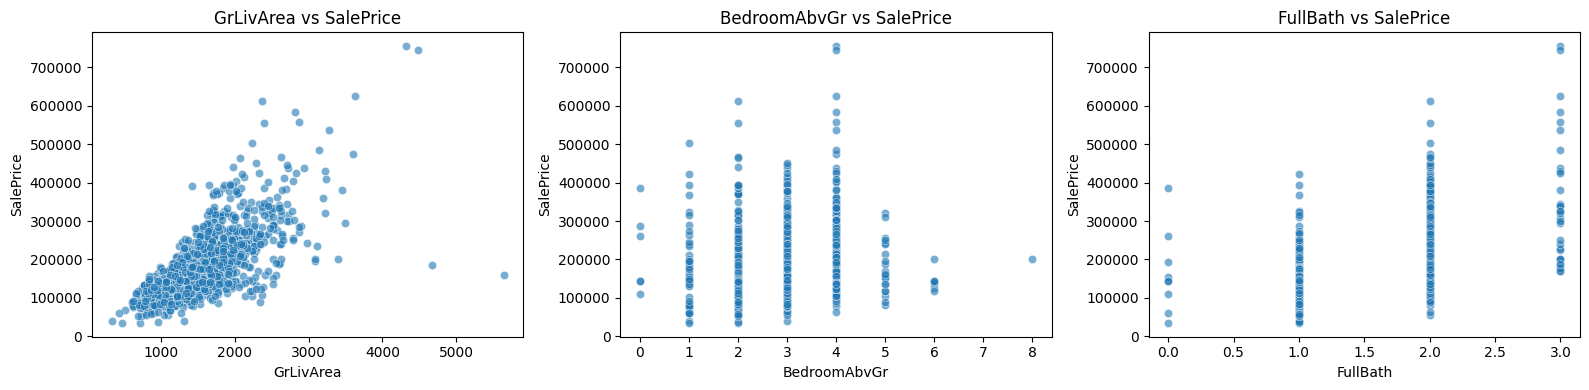

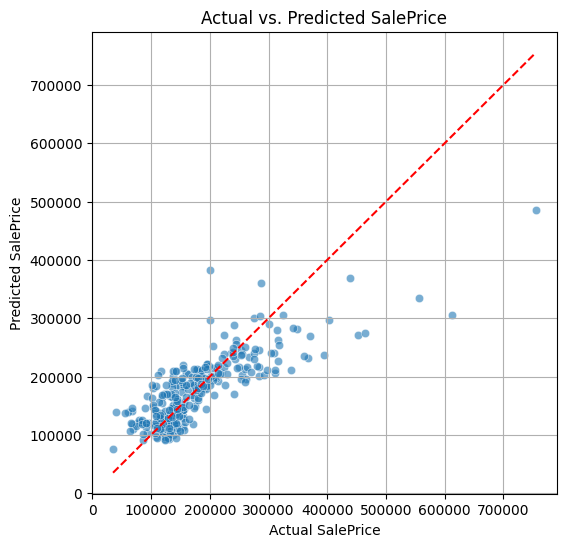

Submission file saved as 'submission.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
#Features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
#Drop missing values
train_data = train_df.dropna(subset=features + [target])
X = train_data[features]
y = train_data[target]
#Train-test-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#Model training
model = LinearRegression()
model.fit(X_train, y_train)
#Predictions and evaluation
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred) ** 0.5
print(f"Validation RMSE: {rmse:.2f}")
#Visualization
#1.Scatter plots of features vs. SalePrice
plt.figure(figsize=(16, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=feature, y=target, data=train_data, alpha=0.6)
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()
#2.Actual vs Predicted SalePrice
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.grid(True)
plt.show()
#Predict on test data and save submission
X_test = test_df[features].fillna(0)  # Handle missing values
test_preds = model.predict(X_test)
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")
